# 1. Read Clean Data. 

## import các thư viện cần thiết

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

### Đọc dữ liệu đã được sử lí. 

In [2]:
cleaned_data_folder = './Processed Data'

Vì thư mục chứa dữ liệu là thư mục gồm các file dữ liệu rời rạc. Nên ta cần kiểm tra thư mục ta đọc có chứa chính xác các file mà ta cần hay không. 

In [3]:
# lấy ra danh sach các file trong thư mục
files = os.listdir(cleaned_data_folder)

print(files)

['UK_Accident_Processed_4.csv', 'UK_Accident_Processed_1.csv', 'UK_Accident_Processed_6.csv', 'UK_Accident_Processed_3.csv', 'UK_Accident_Processed_9.csv', 'UK_Accident_Processed_5.csv', 'UK_Accident_Processed_7.csv', 'UK_Accident_Processed_8.csv', 'UK_Accident_Processed_0.csv', 'UK_Accident_Processed_2.csv']


Sau khi kiểm tra các file trong thư mục đúng với yêu cầu. Ta tiến hành đọc dữ liệu và ghép chúng lại với nhau thành một DataFrame duy nhất.

In [4]:
cleaned_df = pd.DataFrame()

for file in files:
    # đọc file csv
    data = pd.read_csv(cleaned_data_folder + '/' + file)
    # thêm cột 'filename' chứa tên file
    data['filename'] = file
    # thêm dữ liệu vào result
    cleaned_df = pd.concat([cleaned_df, data])

in ra 10 dòng đầu để kiểm tra sơ bộ kết quả đã xử lí. 

In [5]:
cleaned_df.head(10)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year,filename
0,200905EE03198,337560.0,394070.0,-2.941460,53.439681,5,3,1,1,04/12/2009,...,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Wet/Damp,NaN,1,No,E01006616,2009,UK_Accident_Processed_4.csv
1,200905EE03201,335770.0,390990.0,-2.967774,53.411784,5,3,2,1,06/12/2009,...,non-junction pedestrian crossing,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,1,Yes,E01006650,2009,UK_Accident_Processed_4.csv
2,200905EE03202,333870.0,391600.0,-2.996482,53.417031,5,3,3,1,24/11/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,1,Yes,E01006776,2009,UK_Accident_Processed_4.csv
3,200905EE03208,335580.0,393930.0,-2.971235,53.438184,5,2,1,1,04/12/2009,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,NaN,1,Yes,E01006700,2009,UK_Accident_Processed_4.csv
4,200905EE03211,335550.0,393900.0,-2.971680,53.437911,5,3,2,1,05/12/2009,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Raining with high winds,Wet/Damp,NaN,1,No,E01006700,2009,UK_Accident_Processed_4.csv
5,200905EE03214,338470.0,392140.0,-2.927385,53.422442,5,3,2,1,16/11/2009,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Other,Wet/Damp,NaN,1,Yes,E01006761,2009,UK_Accident_Processed_4.csv
6,200905EE03222,337860.0,392290.0,-2.936593,53.423718,5,3,1,1,04/12/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,1,No,E01006760,2009,UK_Accident_Processed_4.csv
7,200905EE03224,334230.0,389630.0,-2.990655,53.399371,5,3,1,1,15/11/2009,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Unknown,Dry,NaN,1,No,E01006517,2009,UK_Accident_Processed_4.csv
8,200905EE03225,338990.0,390490.0,-2.919242,53.407673,5,2,1,2,02/12/2009,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Frost/Ice,NaN,1,Yes,E01006716,2009,UK_Accident_Processed_4.csv
9,200905EE03228,336150.0,395570.0,-2.962989,53.452993,5,3,3,1,07/12/2009,...,non-junction pedestrian crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,1,Yes,E01006791,2009,UK_Accident_Processed_4.csv


# 2. Ask Meaningful Question 

## **Question:** 
Tai nạn giao thông ở Anh có xu hướng thay đổi như thế nào qua các năm, và có các ngày hoặc giờ cụ thể nào trong tuần dễ xảy ra tai nạn hơn không? 

#### **Các thuộc tính có liên quan** 
- `Accident_Index`: Nguyên nhân xảy ra tai nạn. 
- `Date`: Ngày xảy ra tai nạn.  
- `Day_of_week`: ngày trong tuần khi xảy ra tai nạn. 
- `Time`: Thời gian xảy ra tai nạn.


**There is a benefit gained after answering this question:**
- Ta có thể nhận biết được các thời điểm mà có khả năng xảy ra tai nạn cao.  
- Có thể nhận ra các nguyên nhân chính cho từng đoạn đường. 
- Từ những thông tin ta rút được ta có thể có những biện pháp đứng đắn cho từng khung giờ (hạn chế di chuyển vào các khung giờ, chia luồng giao thông một cách hợp lí ...) hay khắc phục các điều kiện ngoại cảnh (các biển báo nên được đặt ở các vị trí nguy hiểm, thông báo các thông tin về đoạn đường, ...)

==> Cuối cùng: Cải thiện được các nguyên nhân, giảm thiểu tỷ lệ tai nạn.

**Phân tích hướng xử lí** 
- Xử lí trên từng cấp độ thời gian (Năm, ngày, giờ).
- Phân tích các hiện tượng đặc biệt xuất hiện khi phân tích. 
- Rút ra kết luận tổng thể.

---

## Answer Question

### 1. chuẩn bị dữ liệu 

Để đảm bảo dữ liệu không bị thay đổi hay làm sai thì ta sẽ tạo một bản sao mới và xử lí trên nó.

In [6]:
df = cleaned_df.copy()


Chuyển đổi dữ liệu ngày tháng về đúng định dạng datetime

In [7]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', infer_datetime_format=True)

Gom nhóm các giờ xảy ra tai nạn thành các buổi để dễ dàng nhận biết khoảng thời gian, nguyên nhân chủ yếu gây tai nạn.

In [8]:
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"


df['Hour'] = df['Time'].str[0:2]

#cast to numeric
df['Hour'] = pd.to_numeric(df['Hour'])

# set the null value to 0
df['Hour'] = df['Hour'].fillna(0)

#cast to inter value to remove leading zeros
df['Hour'] = df['Hour'].astype(int)

#apply the funtion to our temporary hour column 
df['Daytime'] = df['Hour'].apply(when_was_it)

df[['Time', 'Hour', 'Daytime']].head(10)

,Time,Hour,Daytime
0,12:55,12,office hours (10-15)
1,22:00,22,evening (19-23)
2,13:45,13,office hours (10-15)
3,20:45,20,evening (19-23)
4,01:23,1,night (23-5)
5,17:25,17,afternoon rush (15-19)
6,14:00,14,office hours (10-15)
7,03:00,3,night (23-5)
8,15:30,15,afternoon rush (15-19)
9,08:30,8,morning rush (5-10)


---

### 2. Phân tích xu hướng tai nạn theo năm. 

Lấy ra thông tin năm và số lượng tai nạn theo năm.

In [9]:
accidents_by_year = df.groupby('Year')['Accident_Index'].count()

all_years = pd.Series(range(accidents_by_year.index.min(), accidents_by_year.index.max() + 1))

print(all_years)
print(accidents_by_year)

0    2005
1    2006
2    2007
3    2008
4    2009
5    2010
6    2011
7    2012
8    2013
9    2014
dtype: int64
Year
2005    198735
2006    189161
2007    182115
2009    163554
2010    154414
2011    151474
2012    179715
2013    138660
2014    146322
Name: Accident_Index, dtype: int64


Trực quan số lượng vụ tai nạn theo từng năm theo biểu đồ đường đẻ tìm ra xu hướng.

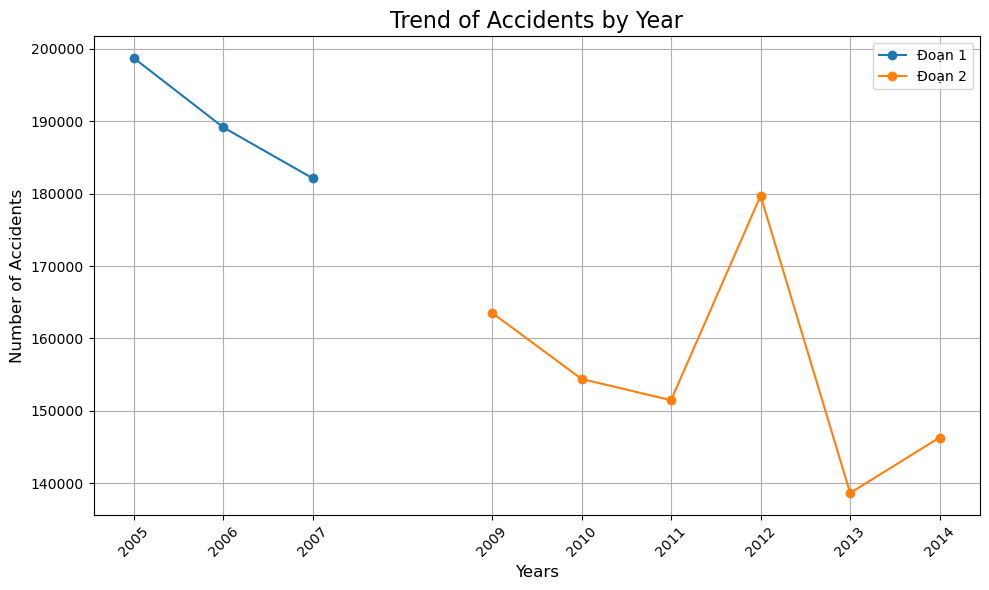

In [10]:
groups = []
current_group = []

for i, year in enumerate(accidents_by_year.index):
    if i == 0 or year == accidents_by_year.index[i - 1] + 1:
        current_group.append((year, accidents_by_year[year]))
    else:
        groups.append(current_group)
        current_group = [(year, accidents_by_year[year])]

if current_group:
    groups.append(current_group)

plt.figure(figsize=(10, 6))

# vẽ từng đoạn (vì có thể có một số năm không có dữ liệu)
for group in groups:
    years, values = zip(*group)
    plt.plot(
        years, values, marker='o', linestyle='-', label=f'Đoạn {groups.index(group) + 1}'
    )

# Thêm thông tin vào biểu đồ
plt.title('Trend of Accidents by Year', fontsize=16)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Number of Accidents', fontsize=12)
plt.xticks(accidents_by_year.index, rotation=45)  
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Nhận xét:**
1. Đoạn một. 
- Số vụ tai nạn giảm đáng kể từ năm 2005 đến 2007. 
- Đây có thể là dấu hiệu của những cải thiện trong an toàn giao thông hoặc biện pháp giảm thiểu tai nạn hiệu quả trong giai đoạn này. 

2. Đoạn hai. 
- Số vụ tai nạn giao động khá lớn. 
- Biến động này có thể phản ánh các yếu tô thay đổi như điều kiện kinh tế hoặc tình hình thời tiết, ... 

3. Tổng quan. 
- Biểu đồ cung cấp cái nhìn tốt về xu hướng thay đổi tai nạn qua thời gian. Đặc biệt là sự cải thiện từ giai đoạn đầu (2005 - 2007).
- Mặc dù tại giai đoạn hai có biến động, tuy nhiên trên tổng thể thì ta có thể thấy xu hướng tai nạn đã giảm đáng kể qua các năm. Qua đó cũng cho thấy khả năng cải thiện đáng kể về các biện pháp an toàn giao thông. 

---


### 3. Phân tích tai nạn theo từng ngày trong tuần.

Lấy ra tổng số số vụ tai nạn theo từng ngày.

In [11]:
accidents_by_day_of_week = df.groupby('Day_of_Week')['Accident_Index'].count()
accidents_by_day_of_week

Day_of_Week
1    164972
2    213748
3    224110
4    226359
5    226411
6    247137
7    201413
Name: Accident_Index, dtype: int64

Sau khi lấy ra ta đã có được tổng thể các thông tin. Tuy nhiên các ngày đang được biểu diễn dưới dạng số nên ra mapping thành các chuỗi để dễ đọc và quan sát.

In [12]:
day_of_week = {
    1: 'Sunday',
    2: 'Monday',
    3: 'Tuesday',
    4: 'Wednesday',
    5: 'Thursday',
    6: 'Friday',
    7: 'Saturday'
}

accidents_by_day_of_week.index = accidents_by_day_of_week.index.map(day_of_week)
accidents_by_day_of_week

Day_of_Week
Sunday       164972
Monday       213748
Tuesday      224110
Wednesday    226359
Thursday     226411
Friday       247137
Saturday     201413
Name: Accident_Index, dtype: int64

Ta tiên hành vẽ các biểu đồ để tìm hiểu rõ hơn.

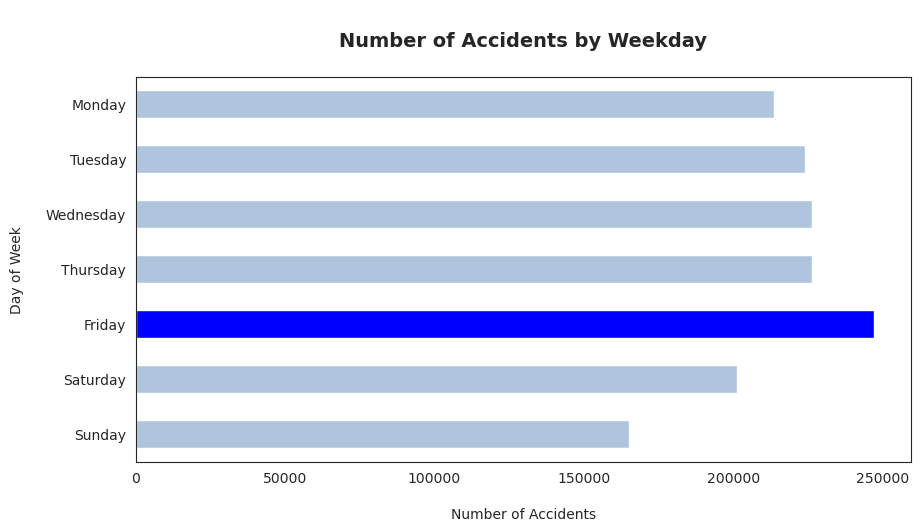

In [13]:
# Định nghĩa danh sách các ngày
days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']

sns.set_style('white')
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['lightsteelblue', 'lightsteelblue', 'blue', 'lightsteelblue', 
          'lightsteelblue', 'lightsteelblue', 'lightsteelblue']

accidents_by_day_of_week.reindex(days).plot(kind='barh', ax=ax, color=colors)

ax.set_title('\nNumber of Accidents by Weekday\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of Accidents', ylabel='Day of Week\n')

# Hiển thị biểu đồ
plt.show()

**Nhận xét:** 
- Số vụ tai nạn cao nhất xảy ra vào `thứ sáu` với số lượng nổi bật so với các ngày khác, được biểu diễn bằng màu xanh đậm. 
- Các ngày còn lại trong tuần có số vụ tai nạn tương đối đồng đều, với số lượng giảm dần vào cuối tuần (Thứ bảy và Chủ nhật). 
 

Sau khi phân tích biểu đồ trên ta thấy `Thứ Sáu` đặc biệt nên ta cần phân tích sâu số lượng vụ tai nạn theo từng ngày trong tuần của năm

In [14]:
# 
weekday = df['Day_of_Week'].map(day_of_week)
year    = df['Year']

accident_table = df.groupby([year, weekday]).size()


accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               .reindex(columns=days)

accident_table.fillna(0, inplace=True)
accident_table = accident_table.astype(int)
accident_table

Weekday,Sunday,Saturday,Friday,Thursday,Wednesday,Tuesday,Monday
Year,,,,,,,
2005,21910,26945,32738,29738,30373,29219,27812
2006,21443,25980,31994,28150,28108,27342,26144
2007,20386,24686,29262,27303,27300,26927,26251
2009,17861,22160,26666,24305,24799,24791,22972
2010,16794,20820,25475,22810,23018,23045,22452
2011,16274,20003,24948,23461,22926,22470,21392
2012,19510,23771,29050,27678,27164,26741,25801
2013,14854,18027,23044,21186,20461,21257,19831
2014,15940,19021,23960,21780,22210,22318,21093


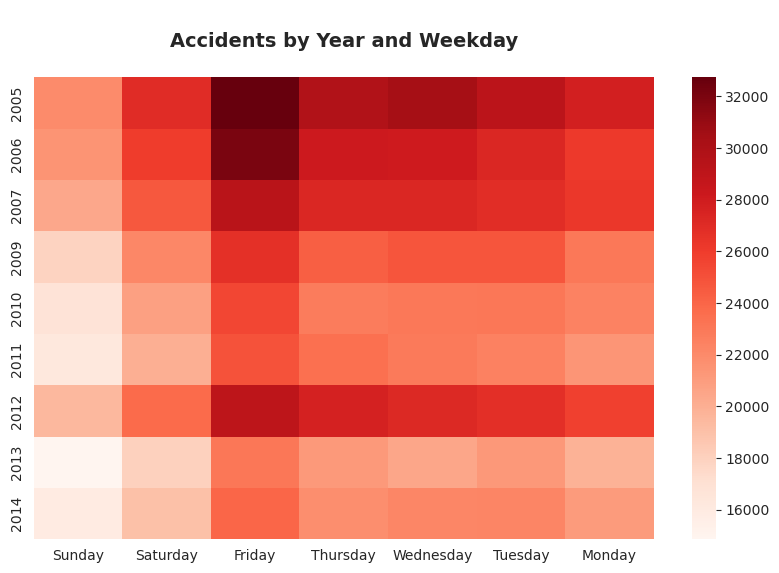

In [15]:
# Plotting dataframe
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds')
plt.title('\nAccidents by Year and Weekday\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

**Nhận xét:**
- Màu sắc đạm nhất (đỏ thẫm): cho thấy sô vụ tai nạn cao nhất vào `Thứ Sáu`, trong xuyên suốt nhiều năm.  
- Các ngày `Thứ Hai`, `Thứ Ba`, `Thứ Tư` và `Thứ Năm` có số lượng tai nạn tương đối đều nhau nhưng màu sắc nhạt hơn. 
- `Thứ Bảy` và `Chủ Nhật` có số vụ tai nạn thấp hơn đáng kể so với các ngày trong tuần, **Điều này tạo nên sự nhất quán đối với biểu đồ thức nhất**. 
- Xu hướng giảm dần tai nạn từ năm 2005 đến 2014: số vụ tai nạn trong các năm gần đây (2014) trở nên ít hơn so với các năm trước rất nhiều. 

--- 

### 4. Phân tích tai nạn từ các khoảng thời gian trong ngày. 

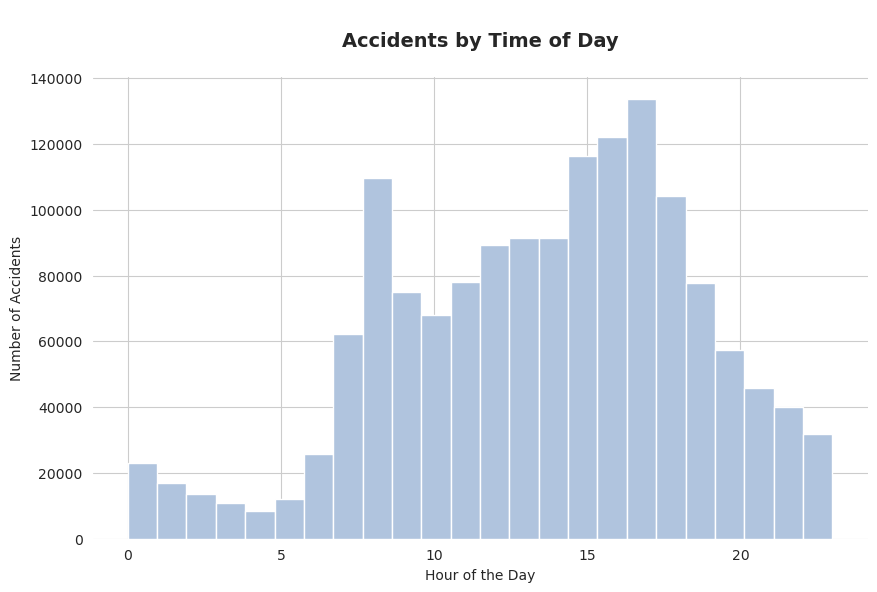

In [16]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
df.Hour.hist(bins=24, ax=ax, color='lightsteelblue')
ax.set_title('\nAccidents by Time of Day\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Number of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

[Text(0.5, 0, '\nNumber of Accidents'), Text(0, 0.5, '')]

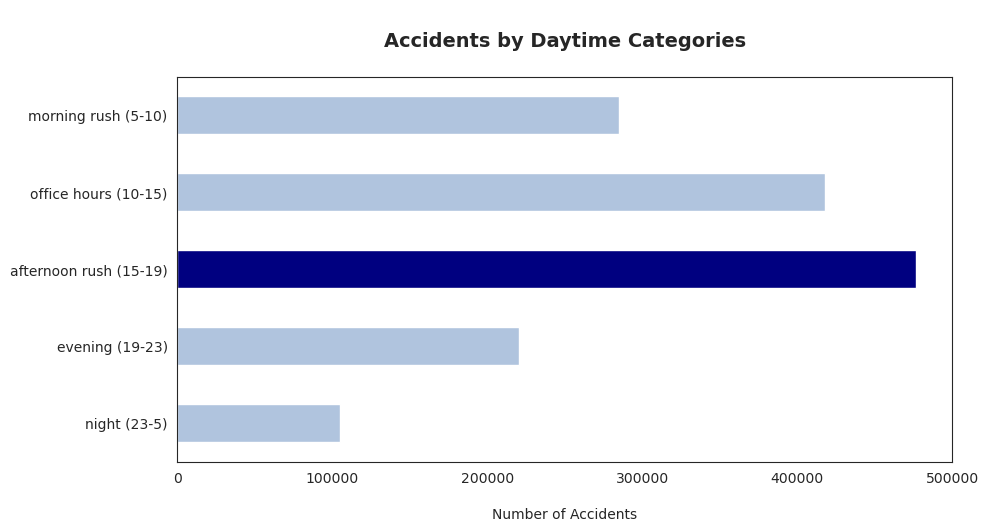

In [17]:
# prepare dataframe
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
df_sub = df.groupby('Daytime').size().reindex(order)

fig, ax = plt.subplots(figsize=(10, 5))
colors = ['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 'lightsteelblue']


df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents by Daytime Categories\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nNumber of Accidents', ylabel='')


- **Xu hướng tổng quát**: 
  Số vụ tai nạn có xu hướng tăng dần từ sáng sớm, đạt đỉnh vào khoảng **15:00 - 16:00**, sau đó giảm dần vào buổi tối.
- **Thời gian thấp nhất**: 
  Số vụ tai nạn thấp nhất vào khoảng **3:00 - 5:00**, khi hầu hết mọi người đang ngủ hoặc giao thông thưa thớt.
- **Thời gian cao nhất**: 
  Giao thông nguy hiểm nhất là vào giờ cao điểm buổi chiều (**15:00 - 18:00**), có thể do mật độ giao thông tăng lên khi mọi người tan sở hoặc đi học về.

- **Phân loại giờ trong ngày**:
  1. **Morning rush (5-10)**: Có số lượng tai nạn cao, nhưng thấp hơn giờ cao điểm buổi chiều.
  2. **Office hours (10-15)**: Tai nạn tiếp tục tăng dần, với nhiều người tham gia giao thông.
  3. **Afternoon rush (15-19)**: Đây là khung giờ nguy hiểm nhất, chiếm số lượng tai nạn cao nhất trong ngày.
  4. **Evening (19-23)**: Tai nạn giảm, nhưng vẫn ở mức đáng kể do lượng xe cộ vào giờ tối.
  5. **Night (23-5)**: Tai nạn ở mức thấp nhất, do giao thông thưa thớt.

---

### 5. Vấn đề ngày thứ sáu.

- Qua phân tích tỷ lệ tử vong các ngày trong tuần. Ta có thể nhận thấy rõ ràng là tại ngày `Thứ Sáu` luôn luôn chiếm một tỷ lệ lớn các vụ tai nạn.   
- Vì thế ta cân nhắc việc phân tích sâu hơn vào ngày này để tìm ra nguyên nhân khiến `Thứ Sáu` có tỷ lệ tai nạn lớn đến thế.  

Ở đầy ta có thể có hai giả thuyết dẫn đến việc `Thứ Sáu` là ngày có lượng tai nạn cao nhất. 
- 1. `Thứ Sáu` là thời gian cuối tuần - khoảng thời gian chuyển đổi từ trạng thái làm việc sang nghỉ ngơi từ hầu hết các công ty - doanh nghiệp. 
- 2. Văn hóa của các quán rượu ở Anh. 



In [18]:
def excess(df, days=1):
    '''
    First counts the number of accidents per day, and then
    calculates the difference in that number between two dates
    that are X days apart.
    '''
    # Start off by counting the number of accidents per day
    df = df.groupby('Date').size().to_frame(name='accidents').reset_index()
    
    # Next, sort the data by date, in anticipation of differencing
    df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")  # Ensure 'Date' is a datetime
    df = df.sort_values(by='Date').reset_index(drop=True)
    df['Day_of_Week'] = df['Date'].dt.strftime("%a")
    
    # Finally, calculate the difference between two neighboring dates
    df['excess'] = df['accidents'] - df['accidents'].shift(days)
    df = df.dropna().reset_index(drop=True)
    df['excess'] = df['excess'].astype('int64')
    
    return df

def display_excess( df, day, title):   
    _ = df.query(f"Day_of_Week=='{day}'")
    sns.lineplot(data=_, x='Date', y='excess', alpha=0.3)
    sns.scatterplot(data=_, x='Date', y='excess', c='r')
    plt.xticks(rotation=90)
    plt.xlabel(None)
    plt.title(title);

day_map = {1: "Sun", 2: "Mon", 3: "Tue", 4: "Wed", 5: "Thu", 6: "Fri", 7: "Sat"}
df["Day_of_Week"] = df["Day_of_Week"].map(day_map)

# Chuyển đổi cột Time
df["Time"] = pd.to_datetime(df["Time"], format="%H:%M").dt.time


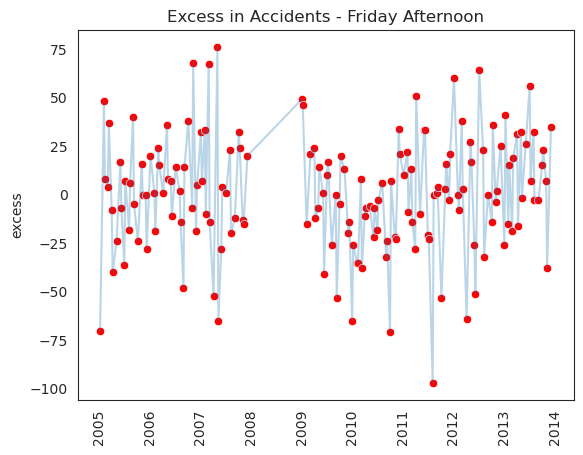

In [19]:
# Lọc dữ liệu
afternoon = (df["Date"].dt.year < 2014) & (df["Time"] >= dt.time(12, 0)) & (df["Time"] <= dt.time(16, 0))
filtered_data = df[afternoon]

# Tính toán excess
_ = excess(filtered_data)
# Vẽ biểu đồ
if _.shape[0] > 0:
    display_excess(_, "Fri", "Excess in Accidents - Friday Afternoon")
    plt.show()
else:
    print("No data to display in plot.")

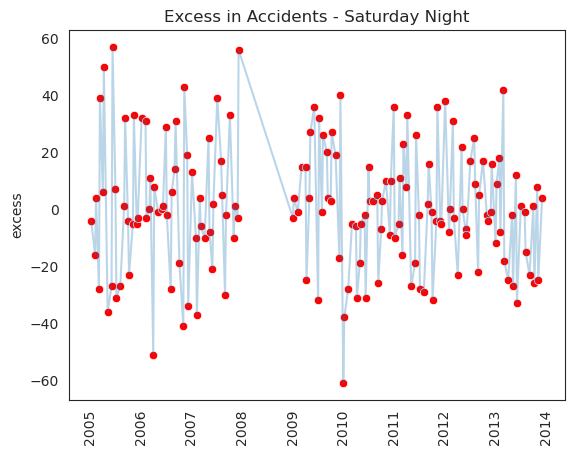

In [20]:
# Lọc dữ liệu
afternoon = (df["Date"].dt.year < 2014) & (df["Time"] >= dt.time(00, 0)) & (df["Time"] <= dt.time(4, 0))
filtered_data = df[afternoon]

# Tính toán excess
_ = excess(filtered_data)
# Vẽ biểu đồ
if _.shape[0] > 0:
    display_excess(_, "Sat", "Excess in Accidents - Saturday Night")
    plt.show()
else:
    print("No data to display in plot.")

**Nhận xét:** Qua hai biểu đồ thể hiện chênh lệch giữa khoảng thời gian từ chiều tối thứ Sáu và sáng sớm Thứ Bảy. Ta không thấy bất cứ dấu hiệu nào cho thấy có tính tuần hoàn trong hai khoảng thời gian này. 
Vì thế ta không thể kết luận giả thiết các quán rượu ở nước Anh là nguyên nhân gây ra tai nạn mà nguyên nhân có thể là do lượng giao thông tăng khi chuyển từ trạng thái lam việc sang trạng thái nghỉ ngơi vào những ngày cuối tuần. 

---

#### Kết luận

1. **Chủ quan**:
   - Những giờ cao điểm, đặc biệt buổi chiều, là thời điểm dễ xảy ra tai nạn nhất. Nguyên nhân có thể bao gồm:
     - Tâm lý vội vã về nhà sau giờ làm việc.
     - Tắc đường làm tăng nguy cơ va chạm.
     - Mệt mỏi hoặc thiếu tập trung sau một ngày dài.

2. **Khách quan**:
   - Tai nạn thường tập trung vào các khung giờ mật độ giao thông cao. 
   - Điều này cho thấy cần tăng cường các biện pháp an toàn giao thông vào giờ cao điểm, đặc biệt vào buổi chiều (**15:00 - 19:00**) và ngày `Thứ Sáu`.
   - Các biện pháp như:
     - Cải thiện cơ sở hạ tầng giao thông.
     - Tăng cường cảnh sát tuần tra vào giờ cao điểm.
     - Tuyên truyền giáo dục ý thức lái xe.
   - Những biện pháp này có thể giúp giảm thiểu tai nạn giao thông.

3. **Xu hướng**: 
    - Tỷ lệ tai nạn có xu hướng giảm qua từng năm điều đó cho thấy các biện pháp cải thiện tình trạng giao thông ở nước anh là hiệu quả. 

**Tổng quát**:   
Các yếu tố thời gian, đặc biệt là khung giờ cao điểm buổi chiều (15:00 - 19:00) và Nhất là vào ngày `Thứ Sáu`, đóng vai trò quan trọng trong việc hình thành nguy cơ tai nạn giao thông tại Vương quốc Anh. Điều này nhấn mạnh tầm quan trọng của việc áp dụng các biện pháp an toàn giao thông như cải thiện cơ sở hạ tầng, tăng cường tuần tra, và nâng cao nhận thức cộng đồng vào các thời điểm mật độ giao thông cao.

Mặc dù tỷ lệ tai nạn có xu hướng giảm qua từng năm, cho thấy hiệu quả của các chính sách và giải pháp đã thực hiện, vẫn cần duy trì và tiếp tục cải thiện các nỗ lực này để đảm bảo an toàn hơn cho người tham gia giao thông.